## 例8-1. 画像勾配を算出するPythonコードの例

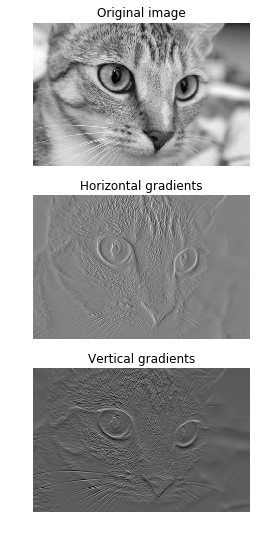

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, color

### 画像をロードしてグレースケールに変換する
image = color.rgb2gray(data.chelsea())

# 水平方向の勾配を中心化した1次元フィルタ（centered 1D filter）を用いて算出する。
# 具体的には境界に位置しないピクセルをその左右に隣接するピクセル値の差で置き換えている。
# 画像両端のピクセルの勾配を0とする。
gx = np.empty(image.shape, dtype=np.double)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]

# 垂直方向の勾配も同様に算出する
gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

# Matplotlibのおまじない
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 9), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box', share=True)

ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')
ax2.set_adjustable('box', share=True)

ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical gradients')
ax3.set_adjustable('box', share=True)

### 例8-2. 画像へのガウシアンフィルタの適用例

In [3]:
import numpy as np

# まずガウシアンフィルタを作成するために 5 x 5 のメッシュグリッドを作成する
ind = [-1., -0.5, 0., 0.5, 1.]
X,Y = np.meshgrid(ind, ind)
X

array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ]])

In [4]:
# 以下のG は (0,0)の値が1.0で、正規化されていないガウシアンフィルタである
G = np.exp(-(np.multiply(X,X) + np.multiply(Y,Y))/2)
G

array([[0.36787944, 0.53526143, 0.60653066, 0.53526143, 0.36787944],
       [0.53526143, 0.77880078, 0.8824969 , 0.77880078, 0.53526143],
       [0.60653066, 0.8824969 , 1.        , 0.8824969 , 0.60653066],
       [0.53526143, 0.77880078, 0.8824969 , 0.77880078, 0.53526143],
       [0.36787944, 0.53526143, 0.60653066, 0.53526143, 0.36787944]])

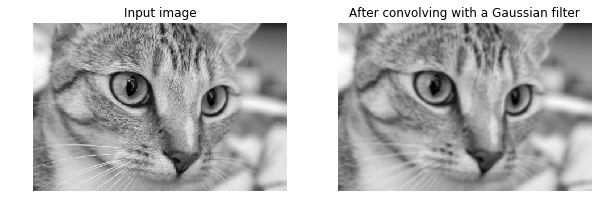

In [5]:
from skimage import data, color
cat = color.rgb2gray(data.chelsea())
from scipy import signal
blurred_cat = signal.convolve2d(cat, G, mode='valid')
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(cat, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box', share=True)

ax2.axis('off')
ax2.imshow(blurred_cat, cmap=plt.cm.gray)
ax2.set_title('After convolving with a Gaussian filter')
ax2.set_adjustable('box', share=True)